# CS470 인공지능개론
## Deep Learning Practice 
#### Prof. Ho-Jin Choi
#### School of Computing, KAIST

---

# Introduction to Tensorflow

1. **Basic of Tensorflow**  
    1-1. Introduction to Tensorflow  
    1-2. Tensors and operations based on eager execution  
    1-3. Neural networks in TensorFlow 
    
1. **MLP-based Classification**   
    2-1. Image classification  
    2-2. Text classification  
    2-3. Overfitting and how to fight it  
    2-4. Save and restore models
---

## 1. Basic of Tensorflow



- [**TensorFlow**](https://www.tensorflow.org) is a software library, developed by Google Brain Team within Google's Machine Learning Intelligence research organization, for the purposes of conducting machine learning and deep neural network research.
- TensorFlow combines the computational algebra of compilation optimization techniques, making easy the calculation of many mathematical expressions that would be difficult to calculate, instead.

#### Main features
* Defining, optimizing, and efficiently calculating mathematical expressions involving multi-dimensional arrays (tensors).
* Programming support of **deep neural networks** and machine learning techniques.
* Transparent use of GPU computing, automating management and optimization of the same memory and the data used. You can write the same code and run it either on CPUs or GPUs. More specifically, TensorFlow will figure out which parts of the computation should be moved to the GPU.
* High scalability of computation across machines and huge data sets.

### 1-2. Tensors and operations based on eager execution

TensorFlow is called TensorFlow because it handles the flow (node/mathematical operation) of Tensors (data), which you can think of as multidimensional arrays. In TensorFlow, computations can be thought of as graphs. In the previous version (≤1.15) of Tensorflow, we implemented a computation graph thought a session we defined and ran the graphs in the session. But, the latest version does not use the session, it can be used simply through an eager executation.

[**Eager execution**](https://www.tensorflow.org/guide/eager) is an imperative programming environment that evaluates operations immediately, without building graphs: operations return concrete values instead of constructing a computational graph to run later. This makes it easy to get started with TensorFlow and debug models, and it reduces boilerplate as well.

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

# Install TensorFlow
try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass
import tensorflow as tf
print('Tensorflow: ', tf.__version__)

import cProfile
import numpy as np
import matplotlib.pyplot as plt

Tensorflow:  2.4.1


In [ ]:
# In Tensorflow 2.0, eager execution is enabled by default.
tf.executing_eagerly()

True

Now, let's define simple computation graph under the eager execution:

![Computation Graph - Add Operation](https://i.imgur.com/K34aWFr.png)

In [ ]:
# TODO: Using the eager execution, create the nodes in the graph, then check the output
a = 
b = 
c = 

print(c)

tf.Tensor(76, shape=(), dtype=int32)


Notice how we've created a computation graph consisting of TensorFlow operations, and how the output is a Tensor with value 76 -- we've just created a computation graph consisting of operations, and it's executed them and given us back the result. That's because of Eager!

#### Not eager execution (FYI)
```python
a = tf.constant(1, name='a')
b = tf.constant(2, name='b')
c = tf.add(a, b, name='c')

with tf.Session() as sess:
    print(sess.run(c))
```

#### Tensor
A **tensor** is a generalization of vectors and matrices to potentially higher dimensions. Internally, TensorFlow represents tensors as n-dimensional arrays of base datatypes.

#### 1-D Tensor (Vector)

In [ ]:
import numpy as np
from functools import partial
pprint = partial(print, end='\n\n')

tensor_1d = tf.constant([1, 2.5, 4.6, 5.75, 9.7], dtype=tf.float64, name='tensor_1d')
print('tensor_1d =', tensor_1d)

tensor_1d = tf.Tensor([1.   2.5  4.6  5.75 9.7 ], shape=(5,), dtype=float64)


You can convert a tensor to a NumPy array either using np.array or the tensor.numpy method

In [ ]:
numpy_1d = tensor_1d.numpy()
print("numpy_1d =", numpy_1d)

tensor_1d = tf.constant(numpy_1d)
print("tensor_1d =", tensor_1d)

#### 2-D Tensor (Matrix)

In [ ]:
tensor_2d = tf.constant(np.arange(16).reshape(4, 4), dtype=tf.float64, name='tensor_2d')
print('tensor_2d =', tensor_2d)

tensor_2d = tf.Tensor(
[[ 0.  1.  2.  3.]
 [ 4.  5.  6.  7.]
 [ 8.  9. 10. 11.]
 [12. 13. 14. 15.]], shape=(4, 4), dtype=float64)


In [ ]:
tensor_2d.numpy()

#### Basic operations in Tensorflow
You can run TensorFlow operations and the results will return immediately because of eager execution.

In [ ]:
A = tf.constant([
    [4, 3],
    [1, 1],
], dtype=tf.float32, name='A')

B = tf.constant([
    [3, 5],
    [1, 2],
], dtype=tf.float32, name='B')

`tf.reduce_sum`: Computes the sum of elements across dimensions of a tensor. (deprecated arguments) <br>
`tf.matrix_determinant`: Computes the determinant of one or more square matrices. <br>
    (e.g. if given matrix is [[a, b], [c, d]], the output of this matrix is ad-bc)

In [ ]:
pprint('A + B =', )
pprint('A - B =', )
pprint('A ⨉ B =', )
pprint('A² =', )
pprint('sum(A) =', )
pprint('inv(A) =', )
pprint('A ⨉ inv(A) =', )
print('det(A) =', )

A + B = tf.Tensor(
[[7. 8.]
 [2. 3.]], shape=(2, 2), dtype=float32)

A - B = tf.Tensor(
[[ 1. -2.]
 [ 0. -1.]], shape=(2, 2), dtype=float32)

A ⨉ B = tf.Tensor(
[[15. 26.]
 [ 4.  7.]], shape=(2, 2), dtype=float32)

A² = tf.Tensor(
[[16.  9.]
 [ 1.  1.]], shape=(2, 2), dtype=float32)

sum(A) = tf.Tensor(9.0, shape=(), dtype=float32)

inv(A) = tf.Tensor(
[[ 1. -3.]
 [-1.  4.]], shape=(2, 2), dtype=float32)

A ⨉ inv(A) = tf.Tensor(
[[1. 0.]
 [0. 1.]], shape=(2, 2), dtype=float32)

det(A) = tf.Tensor(1.0, shape=(), dtype=float32)


#### Introduction to Variables

A TensorFlow variable is the recommended way to represent shared, persistent state your program manipulates. 

Variables are created and tracked via the tf.Variable class. A tf.Variable represents a tensor whose value can be changed by running ops on it. Specific ops allow you to read and modify the values of this tensor. Higher level libraries like tf.keras use tf.Variable to store model parameters.

#### Create a variable

To create a variable, provide an initial value. The tf.Variable will have the same dtype as the initialization value.

In [ ]:
my_tensor = tf.constant([[1.0, 2.0], [3.0, 4.0]])
my_variable = tf.Variable(my_tensor)

# Variables can be all kinds of types, just like tensors
bool_variable = tf.Variable([False, False, False, True])
complex_variable = tf.Variable([5 + 4j, 6 + 1j])

A variable looks and acts like a tensor, and, in fact, is a data structure backed by a tf.Tensor. Like tensors, they have a dtype and a shape, and can be exported to NumPy.

In [ ]:
print("Shape: ", my_variable.shape)
print("DType: ", my_variable.dtype)
print("As NumPy: ", my_variable.numpy())

Most tensor operations work on variables as expected, although variables cannot be reshaped.

In [ ]:
print("A variable:", my_variable)
print("\nViewed as a tensor:", tf.convert_to_tensor(my_variable))
print("\nIndex of highest value:", tf.argmax(my_variable))

# This creates a new tensor; it does not reshape the variable.
print("\nCopying and reshaping: ", tf.reshape(my_variable, ([1,4])))

#### Handling tensors

In [ ]:
import urllib.request as urllib2
import matplotlib.pyplot as plt

# create a file-like object from the url
f = urllib2.urlopen("http://matplotlib.sourceforge.net/_static/logo2.png")

# read the image file in a numpy array
image = plt.imread(f)

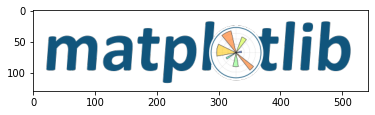

shape of image: (130, 542, 4)


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(image)
plt.show()
print("shape of image:",image.shape)

`tf.slice(input_,begin,size,name=None)`: Extract a slice of _size_ from a tensor input starting at the location specified by _begin_.

Slice the tensor


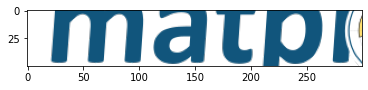

(130, 542, 4)
(50, 300, 4)


In [ ]:
print('Slice the tensor')
sliced = tf.slice(image, [50, 0, 0], [50, 300, -1]) # input, begin, size
plt.imshow(sliced)
plt.show()
print(image.shape)
print(sliced.shape)

`tf.transpose(a,perm=None,name='transpose',conjugate=False)`: Transposes _a_. Permutes the dimensions according to _perm_.

Transepose the tensor


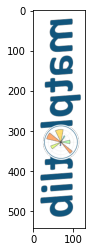

In [ ]:
print('Transepose the tensor')
transposed = tf.transpose(image, perm=[1, 0, 2])
plt.imshow(transposed)
plt.show()

#### Dynamic control flow

As you've seen, TensorFlow now supports an imperative programming style, and that's all because of Eager. As another example of the power of Eager, let's take a look at how we can build a dynamic model that uses Python flow control. Here's an example of the [Fizz buzz](https://en.wikipedia.org/wiki/Fizz_buzz) using TensorFlow’s arithmetic operations. Such dynamic behavior is not possible in past versions of TensorFlow (up to v1.15)!

In [ ]:
def fizzbuzz(max_num):
    counter = tf.constant(0)
    max_num = tf.convert_to_tensor(max_num)
    
    for num in range(1, max_num.numpy() + 1):
        num = tf.constant(num)
        if int(num % 3) == 0 and int(num % 5) == 0:
            print('FizzBuzz')
        elif int(num % 3) == 0:
            print('Fizz')
        elif int(num % 5) == 0:
            print('Buzz')
        else:
            print(num.numpy())
            
        counter += 1

In [ ]:
fizzbuzz(15)

1
tf.Tensor(1, shape=(), dtype=int32)
2
tf.Tensor(2, shape=(), dtype=int32)
Fizz
tf.Tensor(3, shape=(), dtype=int32)
4
tf.Tensor(4, shape=(), dtype=int32)
Buzz
tf.Tensor(5, shape=(), dtype=int32)
Fizz
tf.Tensor(6, shape=(), dtype=int32)
7
tf.Tensor(7, shape=(), dtype=int32)
8
tf.Tensor(8, shape=(), dtype=int32)
Fizz
tf.Tensor(9, shape=(), dtype=int32)
Buzz
tf.Tensor(10, shape=(), dtype=int32)
11
tf.Tensor(11, shape=(), dtype=int32)
Fizz
tf.Tensor(12, shape=(), dtype=int32)
13
tf.Tensor(13, shape=(), dtype=int32)
14
tf.Tensor(14, shape=(), dtype=int32)
FizzBuzz
tf.Tensor(15, shape=(), dtype=int32)


This has conditionals that depend on tensor values and it prints these values at runtime.

### 1-3. Neural networks in TensorFlow

We can define neural networks in TensorFlow, and it's often helpful to think about this using the idea of computation graphs. TensorFlow uses a high-level API called [Keras](https://www.tensorflow.org/guide/keras) that provides a powerful, intuitive framework for building and training deep learning models. In this lecture, we'll be using the Keras API to build and train our models.

Let's consider this example of a very simple neural network of just one dense layer:

<img src="https://i.imgur.com/NxfQgpy.png" width="600">

This graph takes an input `x` and computes an output `out = sigmoid(W * x + b)`. 

First, let's define this computation graph in TensorFlow via a simple function, as we did before:

tf.random.uniform(shape, minval=0, maxval=None, dtype=tf.dtypes.float32, seed=None, name=None): Outputs random values from a uniform distribution.

In [ ]:
# n_in: number of inputs
# n_out: number of outputs
def our_dense_layer(x, n_in, n_out):
    # TODO: define and initialize parameters, a weight matrix W and biases b
    #       x.shape = (..., n_in)
    #       W.shape = (n_in, n_out)
    #       b.shape = (1, n_out)
    W = 
    b = 
    
    # TODO: define the operati0on for z (hint: use tf.matmul)
    z = 

    # TODO: define the operation for out (hint: use tf.sigmoid)
    out = 
    
    return out

Then, we can define an example input, feed it into `our_dense_layer` function, and immediately execute:

In [ ]:
# define an example input (x_input)
x_input = tf.constant([[1.0, 2.0]])

# TODO: call `our_dense_layer` to get the output of the network
print(our_dense_layer(x_input,2, 2))

tf.Tensor([[0.89870685 0.86534435]], shape=(1, 2), dtype=float32)


#### Tensorflow with Keras
Now, instead of explicitly defining a simple function, we'll use the Keras API to define our neural network. This will be especially important as we move on to more complicated network architectures.

Specifically, for this network we'll use the Keras Sequential model from the tf.keras API to define our network. The tf.keras.Sequential model lets us conveniently define a linear stack of network layers. We'll use tf.keras.layers.Dense to define our single fully connected network layer.

In [ ]:
# Define the number of inputs and outputs
n_input_nodes = 2
n_output_nodes = 3

# define a sequential model using Keras API
model = tf.keras.Sequential()
# define a dense (fully connected) layer to compute z using Keras API 
dense_layer = tf.keras.layers.Dense(n_output_nodes, input_shape=(n_input_nodes,), activation='sigmoid')
# add the dense layer to the model
model.add(dense_layer)

In [ ]:
# define an example input (x_input)
x_input = tf.constant([[1.0, 2.0]])

# feed the input into `model` and get the output
print(model(x_input))

tf.Tensor([[0.45733032 0.8017647  0.10460387]], shape=(1, 3), dtype=float32)


### Why Tensorflow?

On a typical system, there are multiple computing devices. 

In TensorFlow, the supported device types are **CPU** and **GPU**. 

They are represented as strings. For example:

* `'/cpu:0'`: The CPU of your machine.
* `'/gpu:0'`: The GPU of your machine, if you have one.
* `'/gpu:1'`: The second GPU of your machine, etc.
    
If a TensorFlow operation has both **CPU** and **GPU** implementations, the GPU devices will be given priority when the operation is assigned to a device. 

For example, `matmul` has both CPU and GPU kernels. On a system with devices `cpu:0` and `gpu:0`, `gpu:0` will be selected to run `matmul`.    

#### Using multiple GPUs

In [ ]:
from tensorflow.python.client import device_lib

def get_available_gpus():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos if x.device_type == 'GPU']

available_gpus = get_available_gpus()
print(available_gpus)

['/device:GPU:0']


In [ ]:
c = []
if available_gpus:
    for d in available_gpus:
        with tf.device(d):
            a = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[2, 3])
            b = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[3, 2])
            c.append(tf.matmul(a, b))
    with tf.device('/cpu:0'):
        result = tf.add_n(c)
        print(result)

tf.Tensor(
[[22. 28.]
 [49. 64.]], shape=(2, 2), dtype=float32)


In [ ]:
import time

with tf.device('/cpu:0'):
    a = tf.random.normal((512, 64, 32, 32))
    b = tf.random.normal((512, 64, 32, 32))
    
    start_time = time.time()
    tf.matmul(a, b)
    end_time = time.time()

print('Elapsed time: {:.4f}s'.format(end_time - start_time))

Elapsed time: 0.0860s


In [ ]:
with tf.device('/gpu:0'):
    a = tf.random.normal((512, 64, 32, 32))
    b = tf.random.normal((512, 64, 32, 32))
    
    start_time = time.time()
    tf.matmul(a, b)
    end_time = time.time()
    
print('Elapsed time: {:.4f}s'.format(end_time - start_time))

Elapsed time: 0.0002s


### More on Tensorflow

[Official API Documentation](https://www.tensorflow.org/api_docs/python)